# **I.KHÁM PHÁ DỮ LIỆU** **văn bản in đậm**

**1.import thư viện**

In [136]:
import math
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_predict, GridSearchCV






import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings
warnings.filterwarnings('ignore')


**2.Chuẩn bị dữ liệu cho một mô hình dự đoán**

In [137]:
import pandas as pd

# Đọc dữ liệu từ file CSV
df = pd.read_csv('../Data/Advertising Budget and Sales.csv', index_col=0, names=['TV', 'Radio', 'Newspaper', 'Sales'], skiprows=1)

# Hiển thị 5 dòng đầu tiên
print(df.head())

# Xác định nhãn và đặc trưng
target = 'Sales'
features = [col for col in df.columns if col != target]

# Sao chép dữ liệu
original_df = df.copy(deep=True)

print('\n\033[1mInference:\033[0m The Dataset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))


      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

Inference: The Dataset consists of 4 features & 200 samples.


**3.Kiểm tra các kiểu dữ liệu của tất cả các cột**

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


*Bộ dữ liệu chiếm 7.8 KB bộ nhớ.*

**4.Kiểm tra số lượng giá trị duy nhất**

In [139]:
df.nunique().sort_values()

Sales        121
Radio        167
Newspaper    172
TV           190
dtype: int64

**5.Phân loại các cột trong bộ dữ liệu thành hai nhóm**

In [140]:
# Đếm số lượng giá trị duy nhất trong các cột đặc trưng, sau đó sắp xếp theo thứ tự tăng dần
nu = df[features].nunique().sort_values()

# Khởi tạo danh sách để lưu các đặc trưng số học (numerical features) và phân loại (categorical features)
nf = []  # Danh sách lưu các đặc trưng số học
cf = []  # Danh sách lưu các đặc trưng phân loại
nnf = 0
ncf = 0

# Duyệt qua tất cả các cột đặc trưng để phân loại thành số học hoặc phân loại
for i in range(df[features].shape[1]):
    # Nếu cột có ≤ 16 giá trị duy nhất, coi nó là đặc trưng phân loại (categorical)
    if nu.values[i] <= 16:
        cf.append(nu.index[i])
    # Nếu cột có > 16 giá trị duy nhất, coi nó là đặc trưng số học (numerical)
    else:
        nf.append(nu.index[i])

# In ra kết quả, hiển thị số lượng đặc trưng số học và phân loại
print('\n\033[1mKết luận:\033[0m Bộ dữ liệu có {} đặc trưng số học và {} đặc trưng phân loại.'.format(len(nf), len(cf)))



Kết luận: Bộ dữ liệu có 3 đặc trưng số học và 0 đặc trưng phân loại.


**6.Tổng hợp và hiển thị các thống kê mô tả**

In [141]:
display(df.describe())

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Số lượng (count) Giá trị trung bình (mean) Độ lệch chuẩn (std) Giá trị tối thiểu (min)  Phân vị (quartiles) 25% (Q1- phân vị thứ nhất) 50% (Q2) (trung vị) 75% (Q3 - phân vị thứ ba) Giá trị tối đa (max)

# **II. PHÂN TÍCH DỮ LIỆU KHÁM PHÁ**

**1.Biểu đồ phân phối của biến mục tiêu**

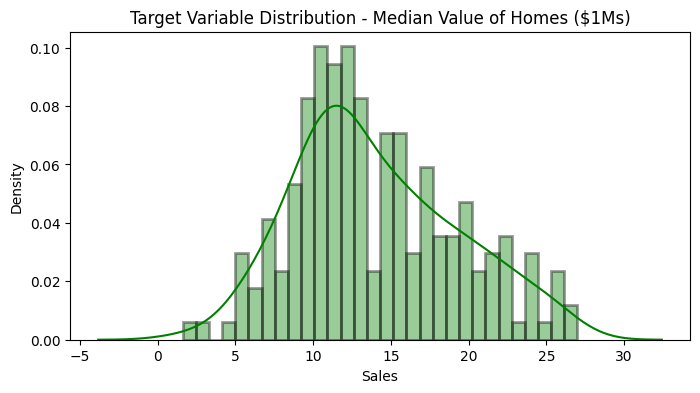

In [142]:
plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

*suy luận: Biến mục tiêu có vẻ như được phân phối bình thường, trung bình khoảng $12(đơn vị)*

**3.Trực quan hóa các đặc điểm số**

                                                   Phân Bố Các Đặc Điểm Số                                                    


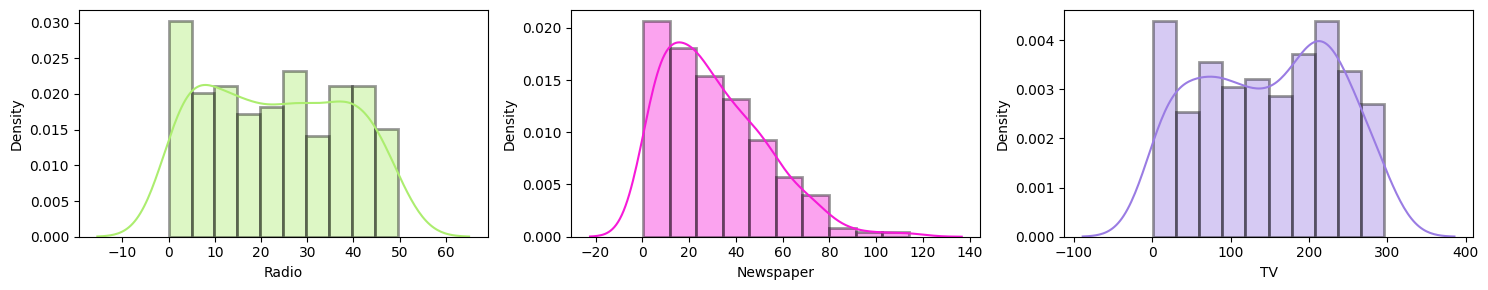

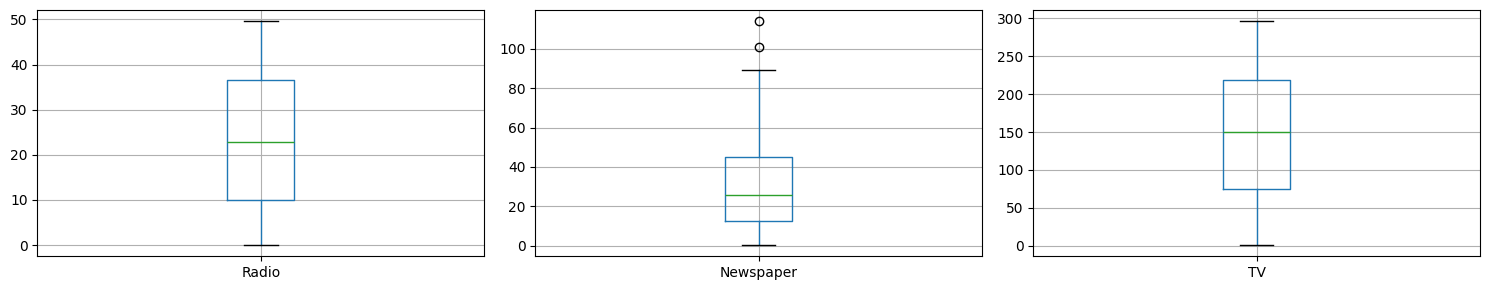

In [143]:
# Trực quan hóa phân bố các đặc điểm số
print('\033[1mPhân Bố Các Đặc Điểm Số'.center(130))

n = 3  # Số lượng cột để hiển thị trong mỗi hàng
plt.figure(figsize=[15, 3 * math.ceil(len(nf) / n)])  # Thiết lập kích thước hình

# Vẽ biểu đồ phân bố cho từng đặc điểm số
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf) / 3), n, i + 1)  # Tạo bố cục cho các biểu đồ
    sns.distplot(df[nf[i]], hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))

plt.tight_layout()  # Điều chỉnh khoảng cách giữa các biểu đồ
plt.show()  # Hiển thị các biểu đồ

# Trực quan hóa các giá trị bất thường (outliers) cho các đặc điểm số
plt.figure(figsize=[15, 3 * math.ceil(len(nf) / n)])  # Thiết lập kích thước hình
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf) / 3), n, i + 1)  # Tạo bố cục cho các boxplot
    df.boxplot(nf[i])  # Vẽ boxplot cho từng đặc điểm số

plt.tight_layout()  # Điều chỉnh khoảng cách giữa các boxplot
plt.show()  # Hiển thị boxplots


*Kết luận: Có vẻ như có một số giá trị bất thường. Chúng ta sẽ xử lý chúng trong phần tiếp theo...*



*   mật độ (density)
*   dương mau xanh la duong trung vi

*   Râu trên và râu dưới: Các đường thẳng kéo dài từ hộp đến các giá trị cực đại và cực tiểu trong dữ liệu, nhưng không bao gồm các giá trị ngoại lai (outliers)
*   Giới hạn trên của hộp (box) trong biểu đồ hộp (box plot) là phần tư thứ ba (Q3), còn giới hạn dưới của hộp là phần tư thứ nhất (Q1).

*   Các điểm nằm ngoài râu: Những điểm này được coi là giá trị ngoại lai, nằm ngoài khoảng [Q1 - 1.5IQR, Q3 + 1.5IQR].

với IQR = Q3 - Q1








# **III. TIỀN XỬ LÝ DỮ LIỆU/Thao tác dữ liệu**

**1.Xóa bất kỳ hàng nào trùng lặp**

In [144]:
# Xóa bất kỳ hàng nào trùng lặp (nếu có)
counter = 0
rs, cs = original_df.shape  # Lưu kích thước ban đầu của DataFrame

df.drop_duplicates(inplace=True)  # Xóa các hàng trùng lặp

# Kiểm tra xem kích thước của DataFrame có thay đổi hay không
if df.shape == (rs, cs):
    print('\n\033[1mInference:\033[0m Bộ dữ liệu không có bất kỳ bản sao nào')
else:
    print(f'\n\033[1mInference:\033[0m Số lượng bản sao đã loại bỏ/sửa chữa ---> {rs - df.shape[0]}')



Inference: Bộ dữ liệu không có bất kỳ bản sao nào


**2.Kiểm tra và thống kê các giá trị null**

In [145]:
# Kiểm tra các phần tử null
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Tổng số giá trị Null'])
nvc['Tỷ lệ phần trăm'] = round(nvc['Tổng số giá trị Null'] / df.shape[0], 3) * 100
print(nvc)


           Tổng số giá trị Null  Tỷ lệ phần trăm
TV                            0              0.0
Radio                         0              0.0
Newspaper                     0              0.0
Sales                         0              0.0


*Kết luận : dataset không có bất kì giá trị không nhất quán nào*

**3.Chia tệp dữ liệu / loại bỏ các giá trị ngoại lai/ Chuẩn hóa dữ liệu**

In [146]:

# Đọc dữ liệu từ file CSV
file_path = r'../Data/Advertising Budget and Sales.csv'
df = pd.read_csv(file_path)

# Xóa cột số thứ tự
df = df.drop(columns=['Unnamed: 0'])

# Sao chép DataFrame để làm việc
df1 = df.copy()

# Thay đổi tên cột
df1.columns = [i.replace(' ', '_') for i in df1.columns]

# Định nghĩa biến mục tiêu
target = 'Sales_($)'

# Tách dữ liệu thành đặc trưng và mục tiêu
X = df1.drop(columns=[target])
Y = df1[target]

# Phân chia dữ liệu thành tập huấn luyện (80%) và tập kiểm tra (20%)
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

# Loại bỏ các giá trị ngoại lai từ tập huấn luyện
features1 = Train_X.columns
outlier_indices = []

for i in features1:
    if Train_X[i].dtype in ['int64', 'float64']:
        Q1 = Train_X[i].quantile(0.25)
        Q3 = Train_X[i].quantile(0.75)
        IQR = Q3 - Q1
        outlier_condition = (Train_X[i] < (Q1 - 1.5 * IQR)) | (Train_X[i] > (Q3 + 1.5 * IQR))
        outlier_indices.extend(Train_X[outlier_condition].index.tolist())

# Chỉ loại bỏ các chỉ số ngoại lai duy nhất
outlier_indices = list(set(outlier_indices))
Train_X = Train_X.drop(index=outlier_indices)
Train_Y = Train_Y.drop(index=outlier_indices)

# Chuẩn hóa dữ liệu
scaler_X = StandardScaler()
Train_X_std = scaler_X.fit_transform(Train_X)
Test_X_std = scaler_X.transform(Test_X)

scaler_Y = StandardScaler()
Train_Y_std = scaler_Y.fit_transform(Train_Y.values.reshape(-1, 1)).flatten()
Test_Y_std = scaler_Y.transform(Test_Y.values.reshape(-1, 1)).flatten()

# Lưu scaler vào tệp .pkl
joblib.dump(scaler_X, '../savefile/scaler_X.pkl')
joblib.dump(scaler_Y, '../savefile/scaler_Y.pkl')

# Phân chia tập huấn luyện thành tập huấn luyện và tập validation
Train_X_std, Validation_X_std, Train_Y_std, Validation_Y_std = train_test_split(Train_X_std, Train_Y_std, train_size=0.7, test_size=0.3, random_state=100)

# Tạo DataFrame cho các tập dữ liệu
Train_X_df = pd.DataFrame(Train_X_std, columns=Train_X.columns)
Train_Y_df = pd.DataFrame(Train_Y_std, columns=[target])
Validation_X_df = pd.DataFrame(Validation_X_std, columns=Train_X.columns)
Validation_Y_df = pd.DataFrame(Validation_Y_std, columns=[target])
Test_X_df = pd.DataFrame(Test_X_std, columns=Train_X.columns)
Test_Y_df = pd.DataFrame(Test_Y_std, columns=[target])

# Hiển thị kích thước của các tập dữ liệu
print('Kích thước của các tập dữ liệu:')
print('Tập dữ liệu gốc ---> ', df1.shape)
print('Tập huấn luyện ---> ', Train_X_df.shape, Train_Y_df.shape)
print('Tập xác thực ---> ', Validation_X_df.shape, Validation_Y_df.shape)
print('Tập kiểm tra ---> ', Test_X_df.shape, Test_Y_df.shape)

# Lưu các tập dữ liệu vào các file CSV
Train_X_df.to_csv('../savefile/Train_X.csv', index=False)
Train_Y_df.to_csv('../savefile/Train_Y.csv', index=False)
Validation_X_df.to_csv('../savefile/Val_X.csv', index=False)
Validation_Y_df.to_csv('../savefile/Val_Y.csv', index=False)
Test_X_df.to_csv('../savefile/Test_X.csv', index=False)
Test_Y_df.to_csv('../savefile/Test_Y.csv', index=False)

print("Các file dữ liệu đã được lưu thành công!")


Kích thước của các tập dữ liệu:
Tập dữ liệu gốc --->  (200, 4)
Tập huấn luyện --->  (110, 3) (110, 1)
Tập xác thực --->  (48, 3) (48, 1)
Tập kiểm tra --->  (40, 3) (40, 1)
Các file dữ liệu đã được lưu thành công!


# **IV.Lựa chọn/ Trích xuất tính năng**

                        Ma trận tương quan                        


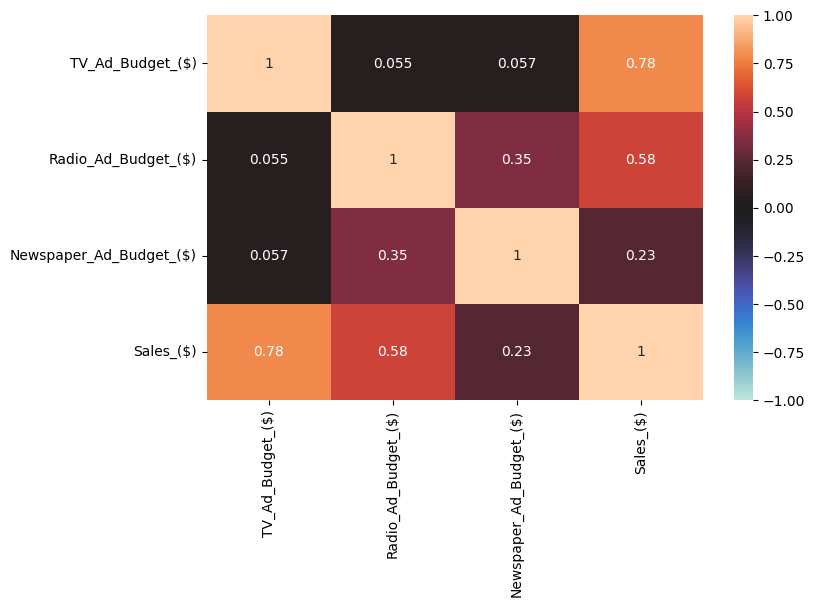

In [147]:
#Kiểm tra sự tương quan giữa các tính năng

print('\033[1mMa trận tương quan'.center(70))
plt.figure(figsize=[8,5])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

**Kết luận:** 
- Sự tương quan mạnh mẽ giữa các tính năng khi chi tiêu cho quảng cáo trên TV tăng, doanh số bán hàng cũng có xu hướng tăng 
- Newspaper có hệ số tương quan là 0.23 ảnh hưởng nhỏ nhưng chưa đến mức nên loại bỏ 

# **VI. Mô hình dự đoán**

**Viết hàm đánh giá (mọi người chỉ cần gọi ra và dùng)**

In [148]:

# Đọc dữ liệu đã được xử lý và tiêu chuẩn hóa
Train_X_std = pd.read_csv('../savefile/Train_X.csv')
Train_Y = pd.read_csv('../savefile/Train_Y.csv').values.ravel()
Val_X_std = pd.read_csv('../savefile/Val_X.csv')
Val_Y = pd.read_csv('../savefile/Val_Y.csv').values.ravel()
Test_X_std = pd.read_csv('../savefile/Test_X.csv')
Test_Y = pd.read_csv('../savefile/Test_Y.csv').values.ravel()

# Hàm đánh giá mô hình
def evaluate_model(model, X_train, Y_train, X_val, Y_val, X_test, Y_test):
    # Dự đoán trên tập huấn luyện, tập xác thực và tập kiểm tra
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    test_preds = model.predict(X_test)

    # Tính toán các chỉ số đánh giá
    train_r2 = r2_score(Y_train, train_preds)
    val_r2 = r2_score(Y_val, val_preds)
    test_r2 = r2_score(Y_test, test_preds)
    train_mse = mean_squared_error(Y_train, train_preds)
    val_mse = mean_squared_error(Y_val, val_preds)
    test_mse = mean_squared_error(Y_test, test_preds)
    train_rmse = np.sqrt(train_mse)
    val_rmse = np.sqrt(val_mse)
    test_rmse = np.sqrt(test_mse)

    print(f'R2 Score on Training Set: {train_r2:.4f}')
    print(f'R2 Score on Validation Set: {val_r2:.4f}')
    print(f'R2 Score on Testing Set: {test_r2:.4f}')
    print(f'MSE on Training Set: {train_mse:.4f}')
    print(f'MSE on Validation Set: {val_mse:.4f}')
    print(f'MSE on Testing Set: {test_mse:.4f}')
    print(f'RMSE on Training Set: {train_rmse:.4f}')
    print(f'RMSE on Validation Set: {val_rmse:.4f}')
    print(f'RMSE on Testing Set: {test_rmse:.4f}')

    return train_r2, val_r2, test_r2, train_mse, val_mse, test_mse, train_rmse, val_rmse, test_rmse





**# ĐỒ THỊ THỂ HIỆN SỰ CHÊNH LỆCH GIÁ TRỊ THỰC VÀ GIÁ TRỊ DỰ ĐOÁN (mình dã viết hàm có sẵn mn chỉ cần gọi và dùng)**

In [149]:
def plot_predictions(model, X, Y, title, subplot_position):
    preds = model.predict(X)
    plt.subplot(1, 3, subplot_position)  # 1 hàng, 3 cột, vị trí của biểu đồ
    plt.scatter(Y, preds, color='blue', label='Predictions')
    plt.plot(Y, Y, color='red', label='True Values')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(title)
    plt.legend()
    plt.grid(True)



    
def plot_predictions_three_sets(model, X_train, Y_train, X_val, Y_val, X_test, Y_test):
    plt.figure(figsize=(18, 6))  # Tạo figure với kích thước phù hợp

    # Vẽ đồ thị cho tập train
    plot_predictions(model, X_train, Y_train, 'Train: Actual vs Prediction', 1)

    # Vẽ đồ thị cho tập validation
    plot_predictions(model, X_val, Y_val, 'Validation: Actual vs Prediction', 2)

    # Vẽ đồ thị cho tập test
    plot_predictions(model, X_test, Y_test, 'Test: Actual vs Prediction', 3)

    plt.tight_layout()
    plt.show()




**DƯỚI ĐÂY LÀ PHẦN TRIỂN KHAI CỦA MÔ HÌNH Linear Regression**

In [150]:

# 1. Linear Regression
print("Linear Regression:")
lin_reg = LinearRegression()
lin_reg.fit(Train_X_std, Train_Y)
evaluate_model(lin_reg, Train_X_std, Train_Y, Val_X_std, Val_Y, Test_X_std, Test_Y)
joblib.dump(lin_reg, r'../savefile/linear_regression_model.pkl')



Linear Regression:
R2 Score on Training Set: 0.8912
R2 Score on Validation Set: 0.8809
R2 Score on Testing Set: 0.9230
MSE on Training Set: 0.1106
MSE on Validation Set: 0.1144
MSE on Testing Set: 0.0584
RMSE on Training Set: 0.3325
RMSE on Validation Set: 0.3383
RMSE on Testing Set: 0.2418


['../savefile/linear_regression_model.pkl']

**VẼ ĐỒ THỊ SỰ CHÊNH LỆCH GIÁ TRỊ THỰC VÀ GIÁ TRỊ DỰ ĐOÁN Linear regression**

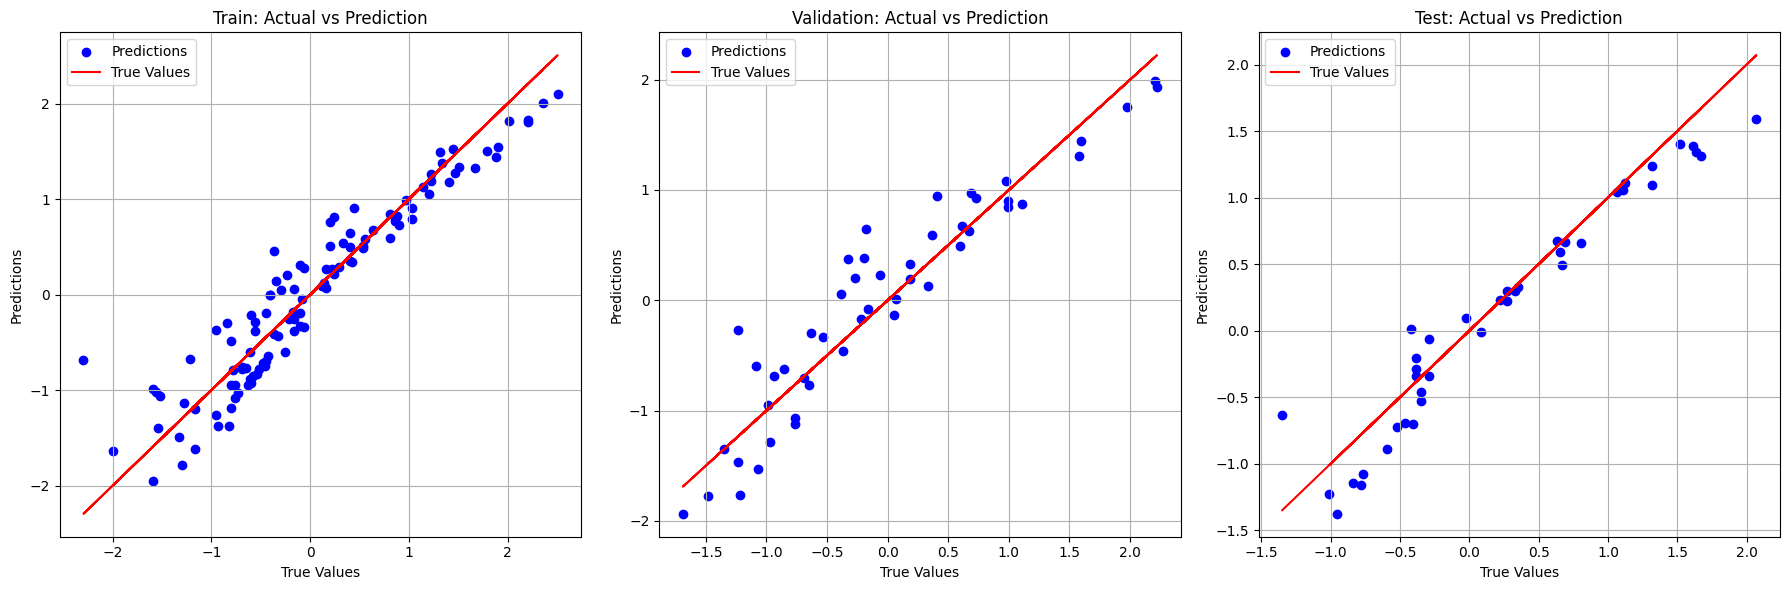

In [151]:

# Gọi hàm để vẽ
plot_predictions_three_sets(lin_reg, Train_X_std, Train_Y, Val_X_std, Val_Y, Test_X_std, Test_Y)

**DƯỚI ĐÂY LÀ PHÂN TRIỂN KHAI MÔ HÌNH Ridge Regression**

**Tìm anpha thích hợp và huấn luyện mô hình **

In [152]:

from sklearn.model_selection import RandomizedSearchCV


# 2. Ridge Regression
print("\nRidge Regression:")


ridge = Ridge()


alpha_range = np.logspace(0, 5, 100)


param_grid = {'alpha': alpha_range}

# grid_search = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=4)
# Khởi tạo RandomizedSearchCV
random_search = RandomizedSearchCV(ridge, param_grid, n_iter=14, scoring='neg_mean_squared_error', cv=6, random_state=0)



random_search.fit(Train_X_std, Train_Y)
# ridge_best = grid_search.best_estimator_
# ridge_best.fit(Train_X_std, Train_Y)
best_alpha = random_search.best_params_['alpha']

ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(Train_X_std, Train_Y)
# ridge_reg.fit(Train_X_std, Train_Y)
evaluate_model(ridge_best, Train_X_std, Train_Y, Val_X_std, Val_Y, Test_X_std, Test_Y)
joblib.dump(ridge_best, '../savefile/ridge_regression_model.pkl')



print(f"Best alpha: {best_alpha}")


Ridge Regression:
R2 Score on Training Set: 0.8911
R2 Score on Validation Set: 0.8824
R2 Score on Testing Set: 0.9221
MSE on Training Set: 0.1107
MSE on Validation Set: 0.1130
MSE on Testing Set: 0.0591
RMSE on Training Set: 0.3327
RMSE on Validation Set: 0.3361
RMSE on Testing Set: 0.2431
Best alpha: 1.2618568830660204


**VẼ ĐỒ THỊ SỰ CHÊNH LỆCH GIÁ TRỊ THỰC VÀ GIÁ TRỊ DỰ ĐOÁN ridge**

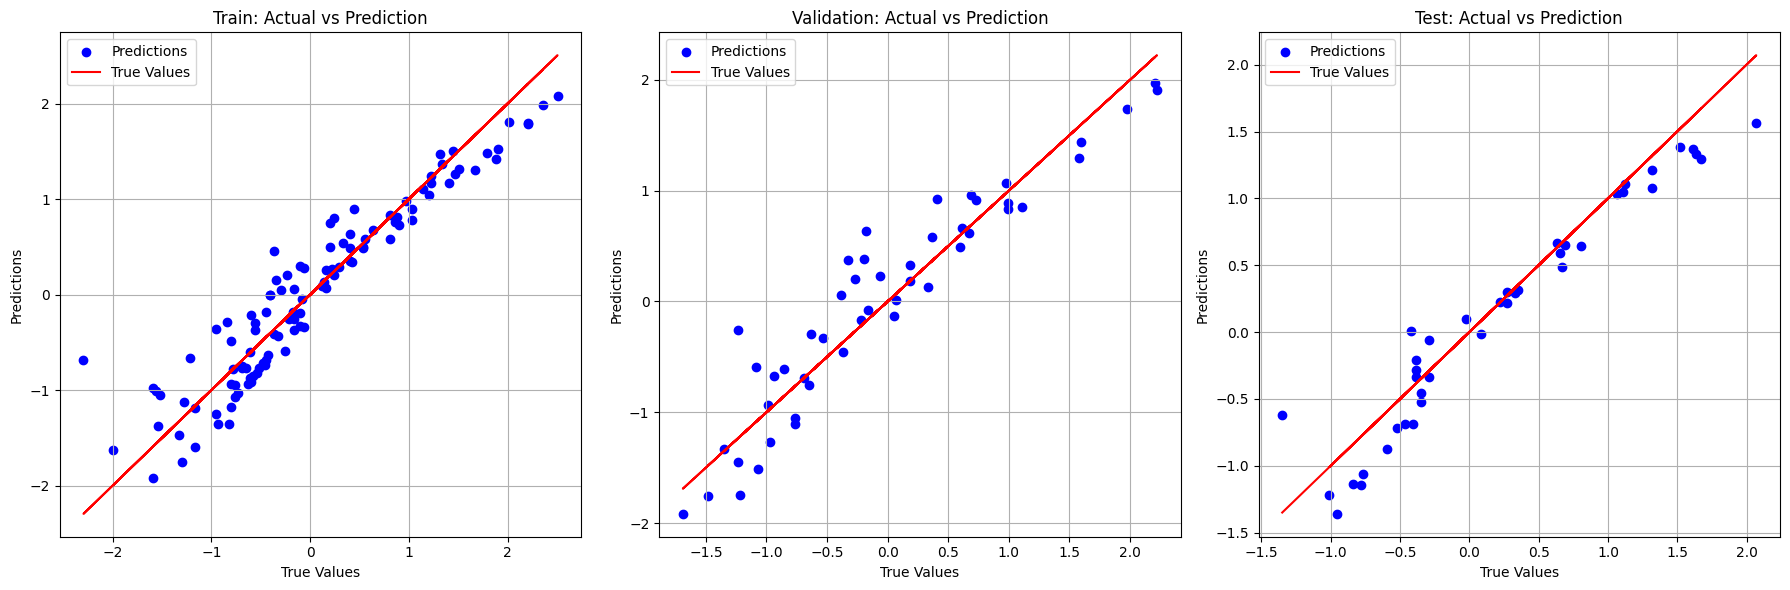

In [153]:
plot_predictions_three_sets(ridge_best, Train_X_std, Train_Y, Val_X_std, Val_Y, Test_X_std, Test_Y)

**DƯỚI ĐÂY LÀ PHẦN TRIỂN KHAI CỦA MÔ HÌNH NEURAL NETWORK**

#Sử dụng GridSearchCV để tìm các siêu tham số tốt nhất trên 3 tệp và đánh giá kết luận sử dụng tham số nào

In [154]:

# 1 Định nghĩa lưới tham số cho GridSearch
param_grid = {
    'hidden_layer_sizes': [ (50,), (100,), (50, 50)],
    'activation': [    'relu',    'tanh'],
    'solver': [     'adam',   'sgd',   ],
    'max_iter': [     1000,     2000, ]
}

mlp = MLPRegressor(random_state=1)

# 2 Tìm kiếm các tham số tốt nhất
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='neg_mean_squared_error')


Trên tập validation

In [155]:

print("\nTrên tập validation")
grid_search.fit(Val_X_std , Val_Y )
# Hiển thị tham số tốt nhất
print("Best parameters found: ", grid_search.best_params_)


Trên tập validation
Best parameters found:  {'activation': 'tanh', 'hidden_layer_sizes': (50, 50), 'max_iter': 1000, 'solver': 'adam'}


Trên tệp Test

In [156]:
print("\n Trên tập test")
grid_search.fit(Test_X_std, Test_Y)
print("Best parameters found: ", grid_search.best_params_)


 Trên tập test
Best parameters found:  {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'max_iter': 1000, 'solver': 'adam'}


Trên tập train

In [157]:
print("\n Trên tập test")
grid_search.fit(Train_X_std,Train_Y)
# Hiển thị tham số tốt nhất
print("Best parameters found: ", grid_search.best_params_)


 Trên tập test
Best parameters found:  {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'max_iter': 1000, 'solver': 'adam'}


In [158]:

# Huấn luyện MLPRegressor
mlp_reg = MLPRegressor(activation='relu',hidden_layer_sizes=(50,50 ),  solver='adam', max_iter=1000, random_state=1)
mlp_reg.fit(Train_X_std, Train_Y)
evaluate_model(mlp_reg, Train_X_std, Train_Y, Val_X_std, Val_Y, Test_X_std, Test_Y)
joblib.dump(mlp_reg, '../savefile/mlp_regression_model.pkl')


R2 Score on Training Set: 0.9802
R2 Score on Validation Set: 0.9845
R2 Score on Testing Set: 0.9871
MSE on Training Set: 0.0201
MSE on Validation Set: 0.0149
MSE on Testing Set: 0.0098
RMSE on Training Set: 0.1417
RMSE on Validation Set: 0.1219
RMSE on Testing Set: 0.0991


['../savefile/mlp_regression_model.pkl']

**VẼ ĐỒ THỊ SỰ CHÊNH LỆCH GIÁ TRỊ THỰC VÀ GIÁ TRỊ DỰ ĐOÁN MLPRegressor**

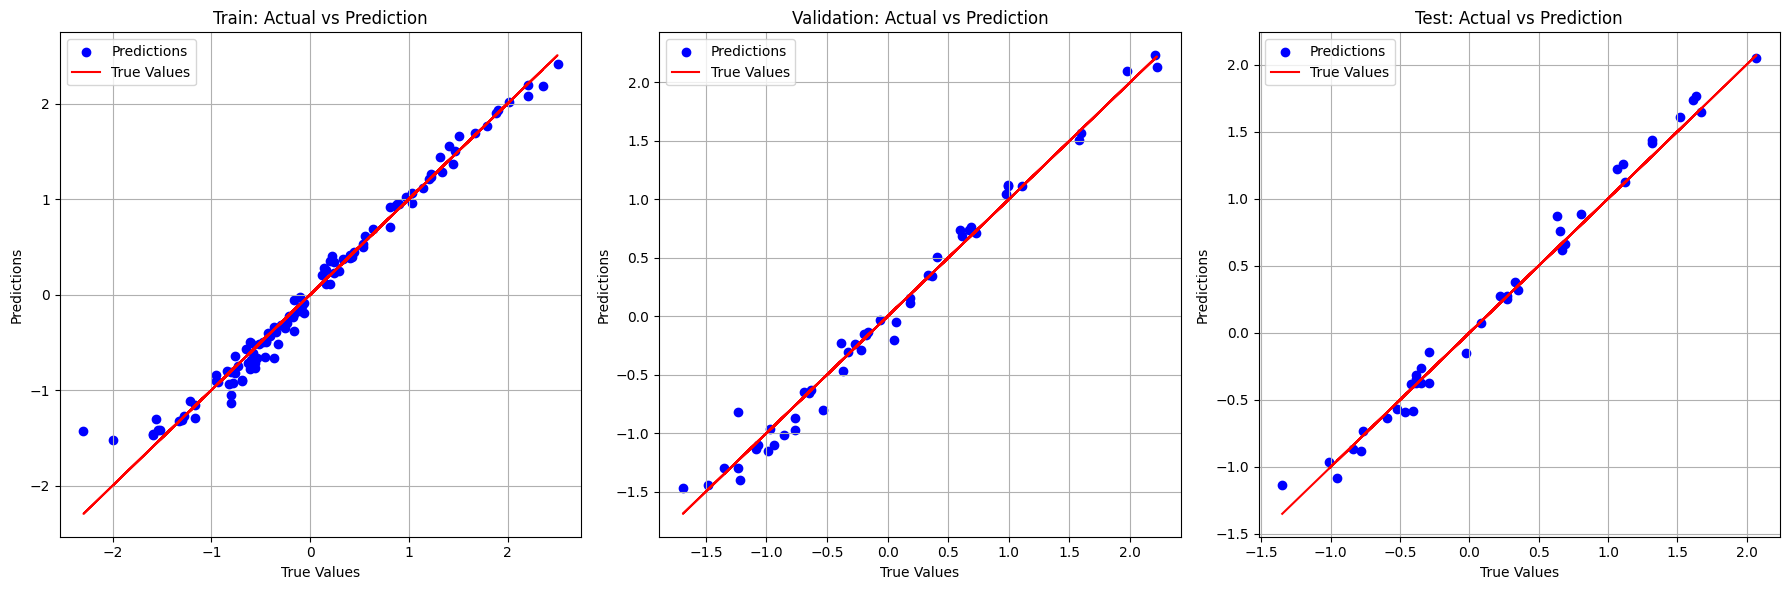

In [159]:

plot_predictions_three_sets(mlp_reg, Train_X_std, Train_Y, Val_X_std, Val_Y, Test_X_std, Test_Y)


**VẼ ĐỒ THI HÀM MẤT MÁT(loss funtion) MLPRegressor**

Số lần lặp thực tế trước khi hội tụ: 97
Tình trạng hội tụ: Mô hình đã hội tụ


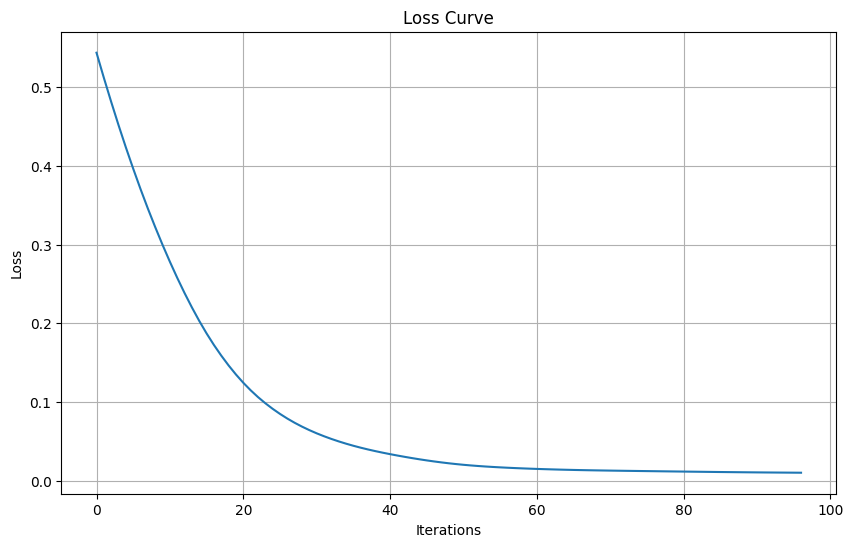

In [160]:

def plot_loss_curve(model):
    plt.plot(model.loss_curve_)
    plt.title('Loss Curve')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid(True)  # Thêm lưới cho đồ thị
    plt.show()

# Kiểm tra số vòng lặp thực tế
print(f"Số lần lặp thực tế trước khi hội tụ: {mlp_reg.n_iter_}")
print(f"Tình trạng hội tụ: {'Mô hình đã hội tụ' if mlp_reg.n_iter_ < mlp_reg.max_iter else 'Mô hình chưa hội tụ'}")
# Vẽ hàm mất mát MLP regession
plot_loss_curve(mlp_reg)

**DƯỚI ĐÂY LÀ PHẦN TRIỂN KHAI CỦA KĨ THUẬT STACKING**

In [161]:

# Load các model đã được train
linear_model = joblib.load('../savefile/linear_regression_model.pkl')
mlp_model = joblib.load('../savefile/mlp_regression_model.pkl')
ridge_model = joblib.load('../savefile/ridge_regression_model.pkl')

# Bước 3: Tạo dự đoán từ các mô hình cơ sở bằng Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Tạo các dự đoán cho từng lớp mô hình cơ sở
train_pred_linear_cv = cross_val_predict(linear_model, Train_X_std, Train_Y, cv=kf)
train_pred_mlp_cv = cross_val_predict(mlp_model, Train_X_std, Train_Y, cv=kf)
train_pred_ridge_cv = cross_val_predict(ridge_model, Train_X_std, Train_Y, cv=kf)

# Ghép các dự đoán thành ma trận đặc trưng cho mô hình meta
train_meta_X_cv = np.column_stack((train_pred_linear_cv, train_pred_mlp_cv, train_pred_ridge_cv))

# Bước 4: Tìm kiếm alpha tốt nhất cho mô hình meta bằng GridSearchCV
# Khởi tạo mô hình Ridge
meta_model = Ridge()

# Tạo lưới tham số để tìm kiếm alpha tốt nhất
param_grid = {'alpha': np.logspace(-3, 3, 50)}  # Các giá trị alpha từ 0.001 đến 1000

# Sử dụng GridSearchCV để tìm alpha tốt nhất
grid_search = GridSearchCV(meta_model, param_grid, cv=kf, scoring='r2')
grid_search.fit(train_meta_X_cv, Train_Y)

# Lấy ra alpha tốt nhất
best_alpha = grid_search.best_params_['alpha']
print(f'Giá trị alpha tốt nhất: {best_alpha}')

# Bước 5: Huấn luyện lại mô hình meta với alpha tốt nhất
meta_model_opt = Ridge(alpha=best_alpha)
meta_model_opt.fit(train_meta_X_cv, Train_Y)

# Bước 6: Đánh giá mô hình trên tập huấn luyện, xác thực và kiểm tra
# Dự đoán trên tập huấn luyện bằng các mô hình cơ sở đã huấn luyện
train_pred_linear = linear_model.predict(Train_X_std)
train_pred_mlp = mlp_model.predict(Train_X_std)
train_pred_ridge = ridge_model.predict(Train_X_std)

# Tạo ma trận đặc trưng cho tập huấn luyện
train_meta_X = np.column_stack((train_pred_linear, train_pred_mlp, train_pred_ridge))

# Dự đoán và đánh giá trên tập huấn luyện
train_meta_pred = meta_model_opt.predict(train_meta_X)

# Tính toán các chỉ số hiệu suất trên tập huấn luyện
train_mse = mean_squared_error(Train_Y, train_meta_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(Train_Y, train_meta_pred)

# Dự đoán trên tập xác thực và kiểm tra bằng các mô hình đã huấn luyện
val_pred_linear = linear_model.predict(Val_X_std)
val_pred_mlp = mlp_model.predict(Val_X_std)
val_pred_ridge = ridge_model.predict(Val_X_std)

test_pred_linear = linear_model.predict(Test_X_std)
test_pred_mlp = mlp_model.predict(Test_X_std)
test_pred_ridge = ridge_model.predict(Test_X_std)

# Tạo ma trận đặc trưng cho tập xác thực và kiểm tra
val_meta_X = np.column_stack((val_pred_linear, val_pred_mlp, val_pred_ridge))
test_meta_X = np.column_stack((test_pred_linear, test_pred_mlp, test_pred_ridge))

# Dự đoán và đánh giá trên tập xác thực và kiểm tra
val_meta_pred = meta_model_opt.predict(val_meta_X)
test_meta_pred = meta_model_opt.predict(test_meta_X)

# Tính toán các chỉ số hiệu suất trên tập xác thực và tập kiểm tra
val_mse = mean_squared_error(Val_Y, val_meta_pred)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(Val_Y, val_meta_pred)

test_mse = mean_squared_error(Test_Y, test_meta_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(Test_Y, test_meta_pred)

# In các chỉ số hiệu suất trên tập huấn luyện, xác thực và kiểm tra
print(f'Training R²: {train_r2:.4f}')
print(f'Validation R²: {val_r2:.4f}')
print(f'Test R²: {test_r2:.4f}')
print(f'Training MSE: {train_mse:.4f}')
print(f'Validation MSE: {val_mse:.4f}')
print(f'Test MSE: {test_mse:.4f}')
print(f'Training RMSE: {train_rmse:.4f}')
print(f'Validation RMSE: {val_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

# Lưu kết quả vào file CSV
performance_metrics = {
    'Metric': ['Training R²', 'Validation R²', 'Test R²',
               'Training MSE', 'Validation MSE', 'Test MSE',
               'Training RMSE', 'Validation RMSE', 'Test RMSE'],
    'Value': [train_r2, val_r2, test_r2,
              train_mse, val_mse, test_mse,
              train_rmse, val_rmse, test_rmse]
}

metrics_df = pd.DataFrame(performance_metrics)

# Lưu DataFrame vào tệp CSV
output_path = r'../savefile/model_performance_metrics.csv'
metrics_df.to_csv(output_path, index=False)

print(f'Kết quả đã được lưu vào {output_path}')

# Lưu các mô hình vào file .pkl
joblib.dump(meta_model_opt, r'../savefile/meta_model.pkl')

print("Các mô hình đã được lưu vào file .pkl thành công.")


Giá trị alpha tốt nhất: 0.15998587196060574
Training R²: 0.9801
Validation R²: 0.9840
Test R²: 0.9866
Training MSE: 0.0202
Validation MSE: 0.0154
Test MSE: 0.0102
Training RMSE: 0.1422
Validation RMSE: 0.1239
Test RMSE: 0.1010
Kết quả đã được lưu vào ../savefile/model_performance_metrics.csv
Các mô hình đã được lưu vào file .pkl thành công.


**VẼ ĐỒ THỊ SỰ CHÊNH LỆCH GIÁ TRỊ THỰC VÀ GIÁ TRỊ DỰ ĐOÁN KĨ THUẬT STACKING**

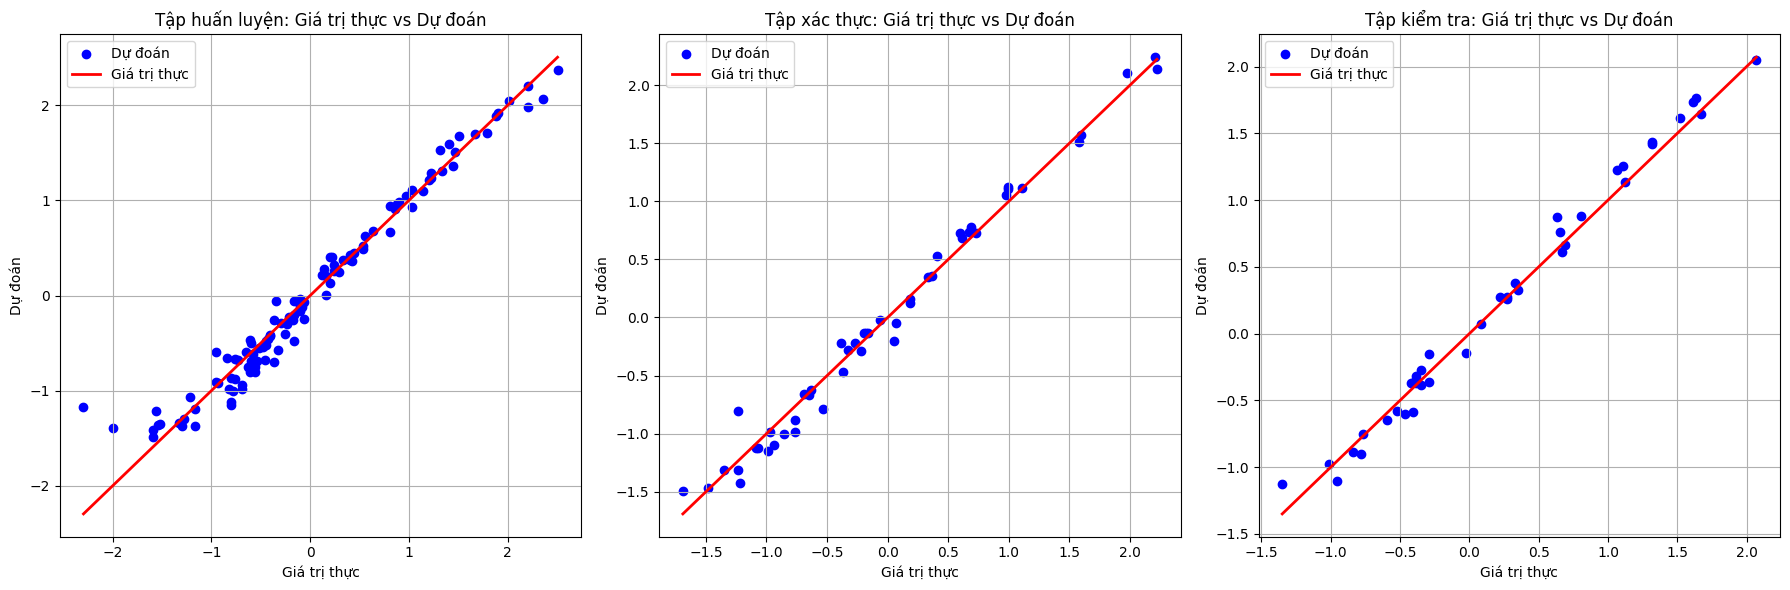

In [162]:


# Bước 1: Dự đoán cho các tập dữ liệu
train_meta_pred = meta_model_opt.predict(train_meta_X_cv)
val_meta_pred = meta_model_opt.predict(val_meta_X)
test_meta_pred = meta_model_opt.predict(test_meta_X)

# Bước 2: Tạo một figure với 3 subplot cho train, validation và test
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Đồ thị cho tập huấn luyện
axs[0].scatter(Train_Y, train_meta_pred, color='blue', label='Dự đoán')
axs[0].plot([Train_Y.min(), Train_Y.max()], [Train_Y.min(), Train_Y.max()], color='red', lw=2, label='Giá trị thực')
axs[0].set_title('Tập huấn luyện: Giá trị thực vs Dự đoán')
axs[0].set_xlabel('Giá trị thực')
axs[0].set_ylabel('Dự đoán')
axs[0].legend()
axs[0].grid(True)

# Đồ thị cho tập xác thực
axs[1].scatter(Val_Y, val_meta_pred, color='blue', label='Dự đoán')
axs[1].plot([Val_Y.min(), Val_Y.max()], [Val_Y.min(), Val_Y.max()], color='red', lw=2, label='Giá trị thực')
axs[1].set_title('Tập xác thực: Giá trị thực vs Dự đoán')
axs[1].set_xlabel('Giá trị thực')
axs[1].set_ylabel('Dự đoán')
axs[1].legend()
axs[1].grid(True)

# Đồ thị cho tập kiểm tra
axs[2].scatter(Test_Y, test_meta_pred, color='blue', label='Dự đoán')
axs[2].plot([Test_Y.min(), Test_Y.max()], [Test_Y.min(), Test_Y.max()], color='red', lw=2, label='Giá trị thực')
axs[2].set_title('Tập kiểm tra: Giá trị thực vs Dự đoán')
axs[2].set_xlabel('Giá trị thực')
axs[2].set_ylabel('Dự đoán')
axs[2].legend()
axs[2].grid(True)

# Bước 3: Hiển thị đồ thị
plt.tight_layout()
plt.show()
